# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

ItemType,BEER,DUNNAGE,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
RetailSales,209763.11,0.0,0.0,309847.85,8109.97,281.34,995.98,313400.42
RetailTransfers,234924.44,0.0,0.0,334176.41,9058.37,171.92,3594.70,340710.51
WarehouseSales,2437617.32,-45331.0,43558.0,33173.32,8656.72,-6754.00,0.00,433009.47


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

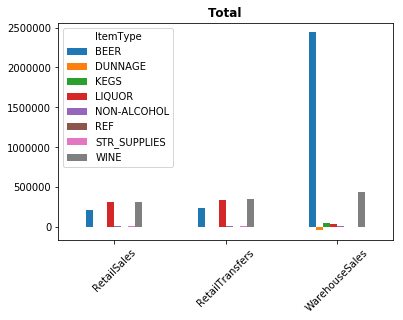

In [3]:
pt=data.pivot_table(values=['RetailSales', 'RetailTransfers', 'WarehouseSales'], columns=['ItemType'], aggfunc='sum')
display (pt)
pt.plot(kind='bar')
plt.title('Total',size=12,fontweight='bold')
plt.xticks(rotation=45)

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

Supplier
MILLER BREWING COMPANY      607646.04
CROWN IMPORTS               606532.53
ANHEUSER BUSCH INC          536415.33
HEINEKEN USA                339735.76
E & J GALLO WINERY          143050.62
DIAGEO NORTH AMERICA INC    111909.24
CONSTELLATION BRANDS         99441.27
BOSTON BEER CORPORATION      64194.16
YUENGLING BREWERY            63433.67
FLYING DOG BREWERY LLLP      57528.30
dtype: float64

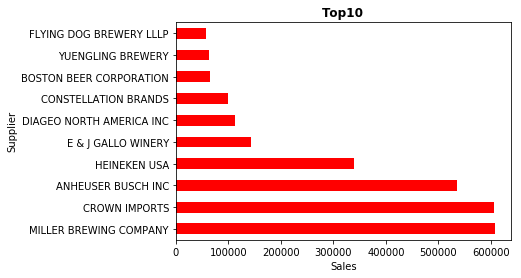

In [4]:
top10=data.pivot_table(values=['RetailSales', 'WarehouseSales'], columns=['Supplier'], aggfunc='sum').T
top10=(top10['RetailSales']+top10['WarehouseSales']).sort_values(ascending=False)[:10]
top10.plot(kind='barh', color='r')
plt.title('Top10',size=12,fontweight='bold')
plt.xlabel('Sales', size=10)
top10

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.679413,5.574833,19.072137
2,5.939247,6.050136,20.229658
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.143914,6.950396,27.839069


Text(0, 0.5, 'Avg')

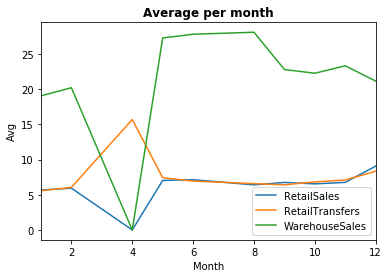

In [5]:
avg=data.pivot_table(values=['RetailSales', 'RetailTransfers', 'WarehouseSales'], columns=['Month'], aggfunc='mean').T
display (avg.head())
avg.plot()
plt.title('Average per month',size=12,fontweight='bold')
plt.ylabel('Avg', size=10)

## 4. Plot the same information as above but as a bar chart.

Text(0, 0.5, 'Avg')

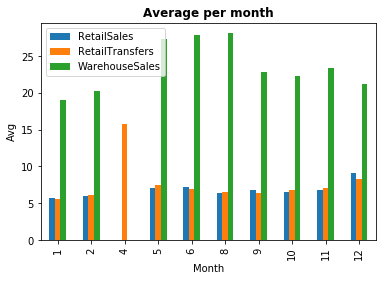

In [6]:
avg.plot(kind='bar')
plt.title('Average per month',size=12,fontweight='bold')
plt.ylabel('Avg', size=10)

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

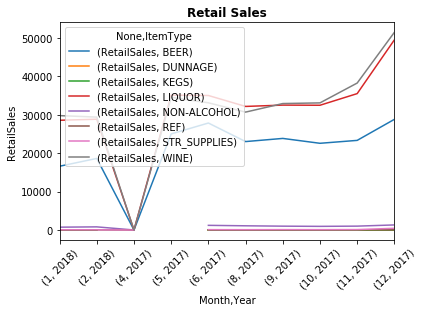

In [7]:
summed=data.pivot_table(values=['RetailSales'], index=['Month', 'Year'] ,columns=['ItemType'], aggfunc='sum')
summed.plot()
plt.title('Retail Sales',size=12,fontweight='bold')
plt.ylabel('RetailSales', size=10)
plt.xticks(rotation=45)

## 6. Plot the same information as above but as a bar chart.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

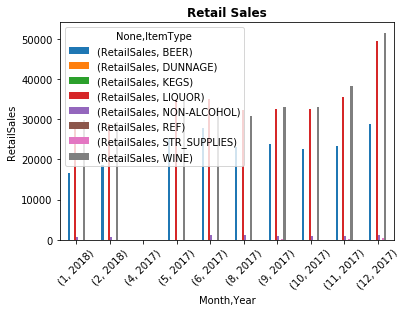

In [8]:
summed.plot(kind='bar')
plt.title('Retail Sales',size=12,fontweight='bold')
plt.ylabel('RetailSales', size=10)
plt.xticks(rotation=45)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

Text(0.5, 1.0, 'Relationship sales-transfers')

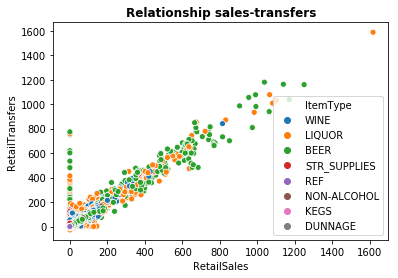

In [9]:
sns.scatterplot(data['RetailSales'], data['RetailTransfers'], hue=data['ItemType'])
plt.title('Relationship sales-transfers',size=12,fontweight='bold')

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

Text(0.5, 1.0, 'Pairplot numeric fields')

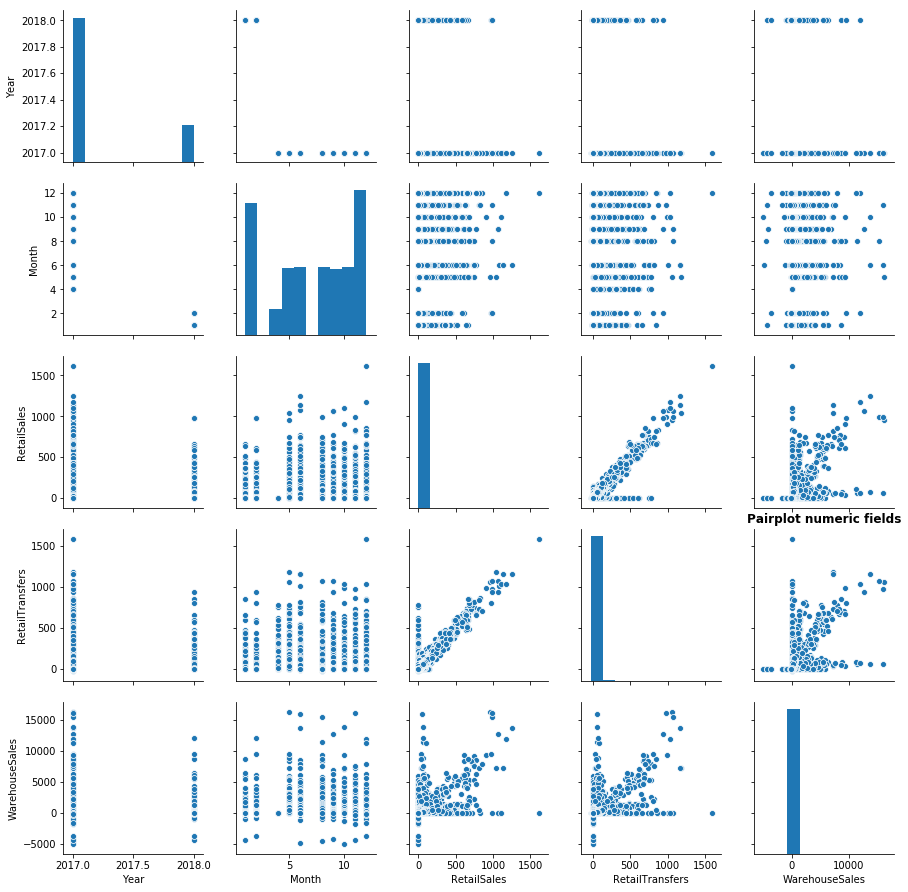

In [10]:
sns.pairplot(data)
plt.title('Pairplot numeric fields',size=12,fontweight='bold')